# **DECISION TREES**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.



---



In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html).

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays
*   The **"Scikit-learn"** library that provides a group of functions related to Decision Trees and dataset splitting
*   **Graphviz**, that will allow us to plot the Decision Trees
* **io**, that allows us to navigate files
*  **Pandas**, that allows us to work with dataframes

In [2]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz
import io
import pandas as pd

## **DATA DEFINITION**

In this activity we have a dataset of medical diagnoses based on having some of these five different symptoms, in order:


*   Temperature
*   Sore throat
*   Cough
*   Headache
*   Muscle pain

The possible diagnoses are:


*   Covid
*   Flu
*   Cold
*   Other

Here we have a set of parameters ***(XTrain)*** consisting of five different values (one for each symptom presented previously) where 0 is not having the symptom and 1 is having it. For each set of parameters we have a diagnose ***(yTrain)*** of the previously listed diagnoses. Here we can see a table containing this data:

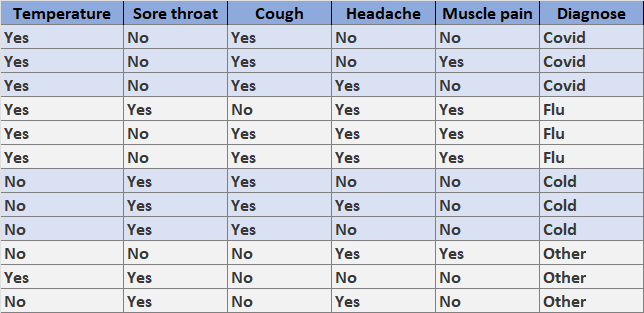




In [3]:
# Parameters of training data
XTrain = np.array([[1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0],\
                   [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 1, 1, 1],\
                   [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0],\
                   [0, 0, 0, 1, 1], [1, 1, 0, 0, 0], [0, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

To start, we have an example of how to create a basic DT using the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html), specifically the **"DecisionTreeClassifier"**. Next, the DT is exported as text and displayed. ***Try changing the criterion to get the information gain (entropy).***

In [4]:
# Fit the classifier
# TO DO: Change the criterion to information gain
clf = tree.DecisionTreeClassifier(criterion="entropy") #_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Export and print the DT
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Muscle pain <= 0.50
|   |   |--- Sore throat <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Sore throat >  0.50
|   |   |   |--- class: Other
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



The ["Tree" module](https://scikit-learn.org/stable/modules/tree.html) allows us to plot the tree, as follows:

[Text(0.4090909090909091, 0.875, 'x[0] <= 0.5\nentropy = 2.0\nsamples = 12\nvalue = [3, 3, 3, 3]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.6363636363636364, 0.625, 'x[4] <= 0.5\nentropy = 1.449\nsamples = 7\nvalue = [0, 3, 3, 1]'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.8181818181818182, 0.375, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 3\n

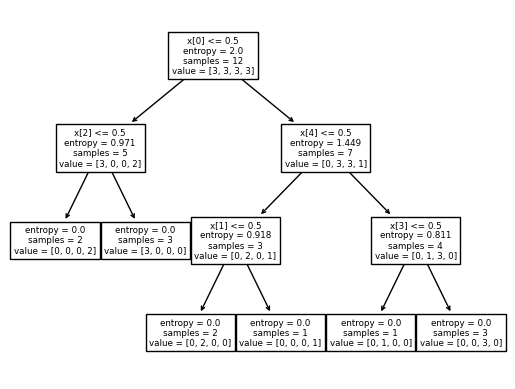

In [5]:
# Plot the decision tree
tree.plot_tree(clf)

The previous plot of the decision tree isn't very easy to understand, so we are going to use the [**"graphviz"** library](https://www.graphviz.org) to plot the DT, as it allows to plot the parameters and the class names. Also it supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. **Search and apply the parameter that defines how to paint the nodes to indicate majority class for classification (different color for each class).**

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Muscle pain <= 0.50
|   |   |--- Sore throat <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Sore throat >  0.50
|   |   |   |--- class: Other
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



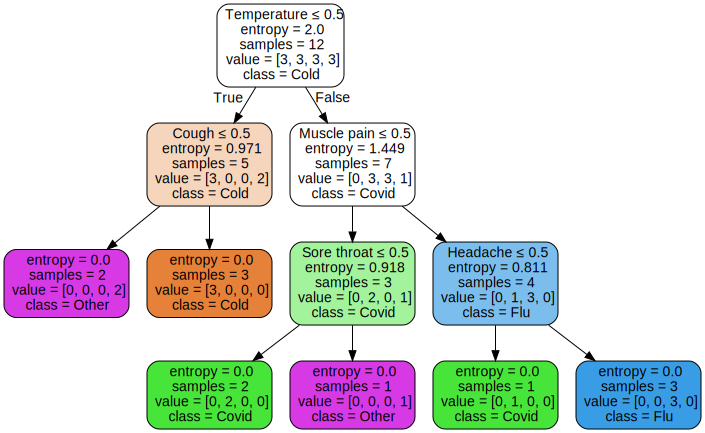

In [6]:
# Export the tree data
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=clf.classes_, filled=True, rounded=True, special_characters=True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Observe the decision tree generated and answer the following questions:


*   What is the most likely diagnose if the patient only has a temperature, a headache and muscle pain?

> <font color='red'> Flu

*   What is the most likely diagnose if the patient only has a temperature and coughs?

> <font color='red'>Covid

*   What is the most likely diagnose if the patient only coughs and has a sore throat?

> <font color='red'>Clod

*   What is the most likely diagnose if the patient only has a temperature?

> <font color='red'>Covid


After you answer, use the DT classifier defined to answer these questions again and check if you were correct.

In [102]:
# TO DO: Define the parameters for each prediction
XTest =[[1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 0, 0], [1, 0, 0, 0, 0]]# ________TO DO_________

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Covid'], dtype='<U5')

Now try to create the same DT but using the actual temperature of each patient. ***Do you get the same DT? Are the answers to the previous questions the same?***

<font color='red'> Using the actual temperature, same DT is found. Yes, my answers are the same.

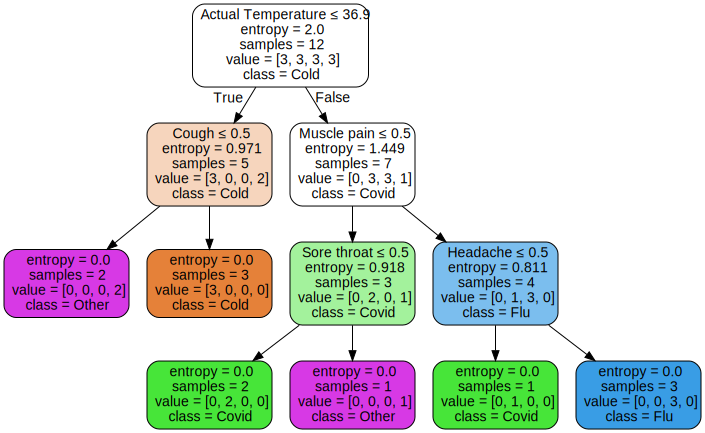

In [103]:
# Parameters of training data
XTrain = np.array([[38.6, 0, 1, 0, 0], [37.9, 0, 1, 0, 1], [37.5, 0, 1, 1, 0],\
                   [39.0, 1, 0, 1, 1], [37.2, 0, 1, 1, 1], [38.4, 0, 1, 1, 1],\
                   [36.1, 1, 1, 0, 0], [35.8, 1, 1, 1, 0], [36.4, 1, 1, 0, 0],\
                   [36.6, 0, 0, 1, 1], [37.3, 1, 0, 0, 0], [35.7, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

# TO DO: Create and fit the classifier
clf = tree.DecisionTreeClassifier(criterion="entropy") #_________TO DO__________
clf = clf.fit(XTrain, yTrain)
#________TO DO_________

# TO DO: Plot the resulting tree
#________TO DO_________
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Actual Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=clf.classes_, filled=True, rounded=True, special_characters=True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Now test your classifier with these data. ***What results do you get?***

<font color='red'> Same result as the previous one is found which is ['Flu', 'Covid', 'Cold', 'Covid']

In [104]:
# Define the parameters for each prediction
XTest = [[38.1, 0, 0, 1, 1], [37.8, 0, 1, 0, 0], [36.3, 1, 1, 0, 0], [37.9, 0, 0, 0, 0]]

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Covid'], dtype='<U5')



---



Now we are going to work with a larger dataset. The dataset is a public dataset coming from Cleveland database that you can download from the subject platform in the Moodle.

It contains 14 columns (one per attribute). The attributes are related to the patient health state. They are the following:


1.	age
2.	sex
3.	chest pain type (4 values)
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	target ( 1=ill, 0=helathy)


The dataset contains the information of 303 patients.

First, run the following cell and load the "heart.csv" file from your disk.


In [ ]:
# TO DO: load "heart.csv" file from disk
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Run this cell to load the data and generate a training and testing dataset that will be later used to generate the classsifier.

In [117]:
# Sort the dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Divide the dataset in 70% training and 30% testing
df_train, df_test = train_test_split(df, test_size=0.3)

# Extract the names of the atributes of the dataset
X_list = df_train.columns.values.tolist()
# Extract the name of the ground truth atribute of the dataset
y_list = X_list.pop()

# Extract the parameters and ground truth of the training data
XTrain = df_train[X_list]
yTrain = df_train[y_list]
# Extract the parameters and ground truth of the testing data
XTest = df_test[X_list]
yTest = df_test[y_list]

Now that we have the sorted data, create a new Decision Tree using entropy criterion for this data and answer the following questions.

* **Which is the % of correct predictions for the training and testing data? Round the value to 2 decimals.**

><font color='red'> % of correct predictions for the training data is 100% and % of correct predictions for the test data is 75.82%

* **Which is the depth of the generated DT?**

><font color='red'>Depth of decision Tree 8

* **How many leaf nodes does it have?**

><font color='red'>number of leaf in decision tree 40

In [118]:
# TO DO: Create and fit DT classifier
clf = tree.DecisionTreeClassifier(criterion="entropy") #_________TO DO__________
clf = clf.fit(XTrain, yTrain)
 #________TO DO__________

# Check predictions for training and testing data
res=clf.predict(XTrain)
res1=clf.predict(XTest)
#________TO DO__________

# Check depth and number of leaf nodes of generated DT
depth = clf.get_depth()
n_leaves = clf.get_n_leaves()
PreDataTrain=(100/len(res)*np.count_nonzero(yTrain == res))
PreDataTest=(100/len(res1)*np.count_nonzero(yTest == res1))
#________TO DO__________
print("% of correct predictions for the training data ", round(PreDataTrain,2))
print("% of correct predictions for the test data ", round(PreDataTest,2))
print("Depth of decision Tree", depth)
print("number of leaf in decision tree", n_leaves)

% of correct predictions for the training data  100.0
% of correct predictions for the test data  75.82
Depth of decision Tree 8
number of leaf in decision tree 40


Plot the DT graph (colored) and analyze it.

<font color='red'> The process of making choices of the model is shown visually by this Decision Tree (DT) graph. Every internal node, starting at the root node, indicates a feature-based decision-making process, whilst the leaf nodes show the expected health state of a patient. The color-filled nodes represent the majority class, and the depth of the tree determines how complex it is; hence, accuracy and interpretability need to be balanced.

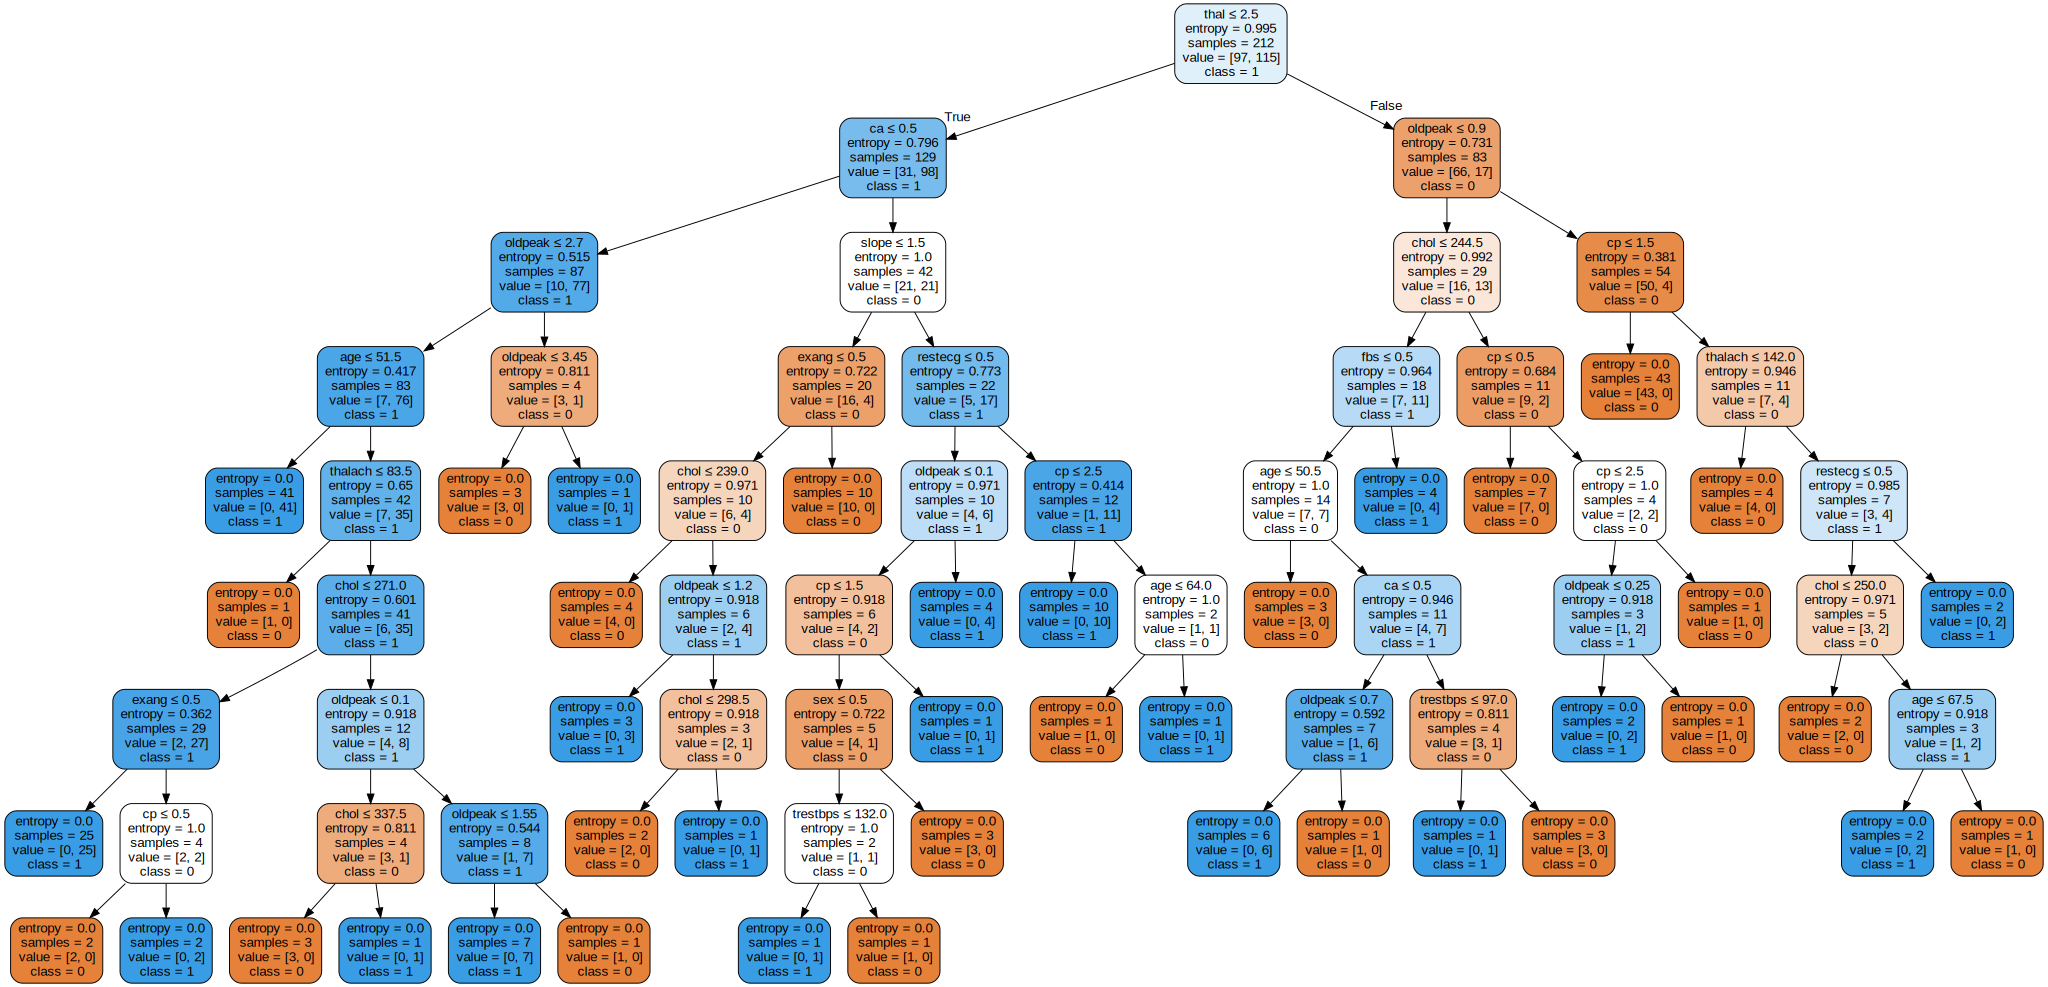

In [119]:
# TO DO: Plot the resulting tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=XTrain.columns,
                     class_names=[str(class_label) for class_label in clf.classes_], rounded=True,
                     special_characters=True, filled= True)  #___TO DO___

# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph
#________TO DO_________

As we've just seen, the DT generated is quite deep and wide. This is because DT tend to overfit the data. To avoid this, we can change the maximum depth and minimum number of leaf nodes allowed. Try different values for each parameter and find the best result. **Which combination works best?**

<font color='red'> To prevent overfitting of the data, the optimal combination is Max depth and Min samples leaf. Finding the Max Depth: 6, Min Samples Leaf: 1 requires experimenting with various settings and assessing the model's performance. 85.71% of the testing data is accurate.

***Hint:* You might want to use a loop to try the different combinations**

In [120]:
# TO DO: Create DT Classifiers with different maximum depths and minimum number of lead nodes allowed
#________TO DO_________


best_accuracy = 0
best_depth = 0
best_min_samples_leaf = 0

for max_depth in range(1, 20):  # Try different values for maximum depth
    for min_samples_leaf in range(1, 20):  # Try different values for minimum number of leaf nodes

        # Create and fit DT classifier with current parameters
        clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf = clf.fit(XTrain, yTrain)

        # Calculate accuracy on testing data
        accuracy = clf.score(XTest, yTest)

        # Check if the current combination gives a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = max_depth
            best_min_samples_leaf = min_samples_leaf

print("Best combination - Max Depth: {}, Min Samples Leaf: {}".format(best_depth, best_min_samples_leaf))
print("Best accuracy on testing data: {:.2f}%".format(best_accuracy * 100))

Best combination - Max Depth: 6, Min Samples Leaf: 1
Best accuracy on testing data: 85.71%


Plot the best DT you found and compare it with the previous one. ***Is it easier to follow?***

<font color='red'> Its accuracy, minimal sample size, best maximum depth, and minimum number of leaves makes it easier to follow than the previous one. Most notably, there is less branching complexity than there was before.

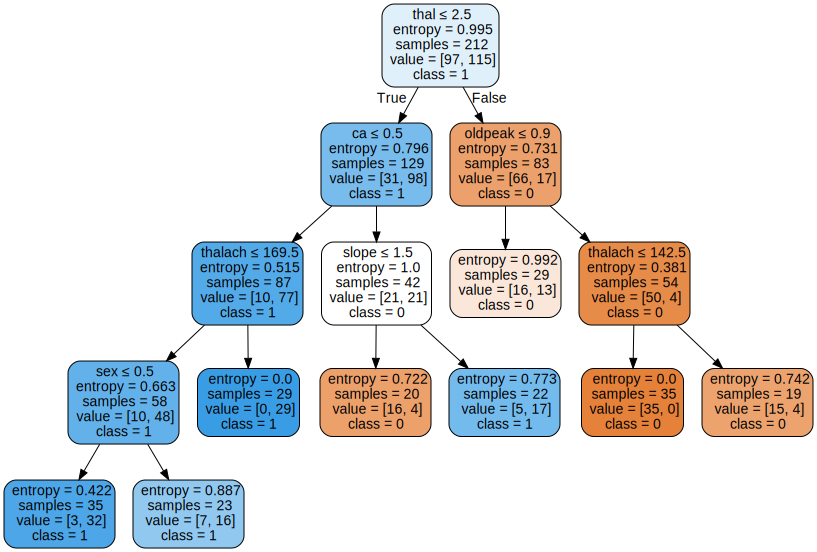

In [121]:
# TO DO: Plot the resulting tree
# Create and fit the best DT classifier
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, min_samples_leaf=best_min_samples_leaf)
best_clf = best_clf.fit(XTrain, yTrain)

# Plot the best DT
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=XTrain.columns,
                     class_names=[str(class_label) for class_label in clf.classes_], rounded=True,
                     special_characters=True, filled= True)  #___TO DO___

# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph
#________TO DO_________

On this lab, we've been using a split of training/test, and we have been taking decisions and changing hyperparameters (e.g. depth) based on the test performance. **Is this the correct methodology?**

<font color='red'> Using a separate training/test phase and making decisions and adjusting hyperparameters in response to test results, in my opinion, is an incorrect practise. For a more reliable model evaluation, we ought to employ cross-validation methods and a validation set.